## Homework 4: Fourier Analysis

## Due date: 

### Student Name:

**Exercise 1.**

a.- Find the Fourier series of the function $f(x) := x$ in the
interval $[-\pi,\pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6
\end{equation*}




**Exercise 2.**

a.- Find the Fourier series of the function $f(x):= e^{sx}$ in the
interval $[-\pi, \pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \pi coth(\pi s)/s = \sum_{n=-\infty}^{\infty} \frac{1}{s^2+n^2}
\end{equation*}




**Exercise 3.**

Let $S_n: L^2 \to L^2$ be the map that sends $f \in L^2$ to the partial
Fourier series,
\begin{equation*}
  S_n(f) := \sum_{m=-n}^{n} c_m e^{imx}, \;\;\;\;\;\;\; 
                 c_m:= \frac{1}{2\pi}\langle e^{imx},f(x) \rangle.
\end{equation*}
Show that the $S_n$ are orthogonal projections and that 
$S_n S_m = S_m S_n = S_m$ if $m \leq n$.



**Exercise 4. Use of the Fourier Interpolation**

Compute the Fourier Interpolation of the functions of above (for $s= 1, 3, 3i$) and plot it along the Fourier series coefficients. Below is an example:

In [5]:
using Pkg
Pkg.instantiate()
using FFTW
using Plots

   Installed NodeJS ────────────── v2.0.0
   Installed ConcurrentUtilities ─ v2.4.2
   Installed OrderedCollections ── v1.6.3
   Installed MIMEs ─────────────── v0.1.4
   Installed Literate ──────────── v2.20.1
   Installed ExceptionUnwrapping ─ v0.1.10
   Installed LiveServer ────────── v1.4.0
   Installed Franklin ──────────── v0.10.95
   Installed FranklinTemplates ─── v0.10.2
   Installed HTTP ──────────────── v1.10.9
Precompiling project...
    701.2 ms  ✓ ExceptionUnwrapping
    806.1 ms  ✓ OrderedCollections
    872.9 ms  ✓ ConcurrentUtilities
   1356.8 ms  ✓ NodeJS
   1598.0 ms  ✓ MIMEs
   1306.8 ms  ✓ Literate
   4010.5 ms  ✓ HTTP
   1318.9 ms  ✓ LiveServer
    829.7 ms  ✓ FranklinTemplates
  16926.2 ms  ✓ Franklin
  10 dependencies successfully precompiled in 25 seconds. 48 already precompiled.


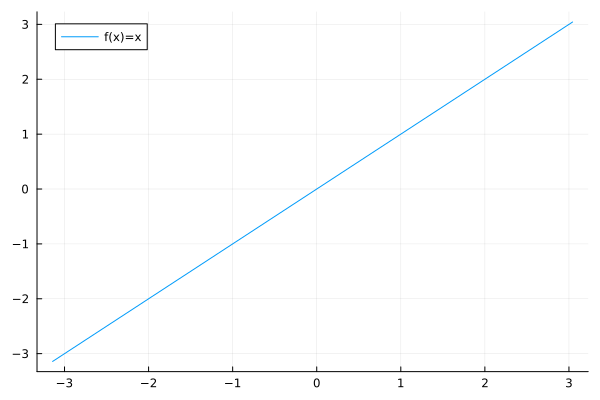

In [49]:
N = 64
f(x) = x
xi = -π
xf = π
xv = [xi + (xf-xi)*(i-1)/N for i in 1:N]
fv = f.(xv)
plot(xv,fv, label="f(x)=x")

The Fourier coefficients of $f(x)=x$ in the interval $[-π,π]$ are $a_n=-i(-1)^n/n$, $n\neq 0$, $a_0 = 0$.

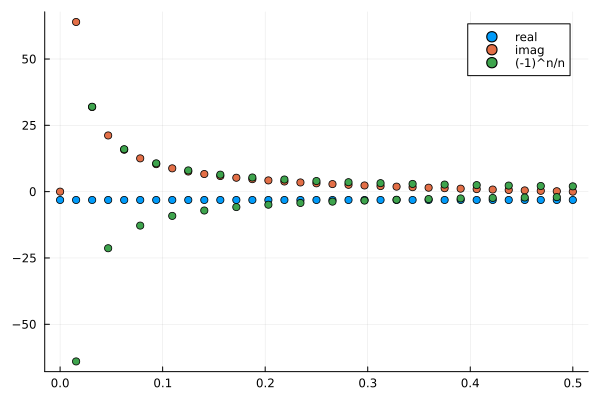

In [52]:
freq = rfftfreq(N)
rft = rfft(fv)
scatter(freq,real.(rft), label="real")
scatter!(freq,imag.(rft), label="imag")
scatter!(freq,(-1).^(freq*N) ./freq, label = "(-1)^n/n")

We get a constant real component and not the oscillation...

In [51]:
freq

33-element Frequencies{Float64}:
 0.0
 0.015625
 0.03125
 0.046875
 0.0625
 0.078125
 0.09375
 0.109375
 0.125
 0.140625
 ⋮
 0.375
 0.390625
 0.40625
 0.421875
 0.4375
 0.453125
 0.46875
 0.484375
 0.5

In [53]:
rft

33-element Vector{ComplexF64}:
 -3.1415926535897936 + 0.0im
  -3.141592653589794 + 63.948587551044625im
  -3.141592653589793 + 31.89712550035743im
 -3.1415926535897944 + 21.178897351376964im
 -3.1415926535897927 + 15.793852815564405im
  -3.141592653589793 + 12.54194091057854im
  -3.141592653589793 + 10.356443051331754im
 -3.1415926535897922 + 8.780163274215004im
 -3.1415926535897927 + 7.584475591748157im
 -3.1415926535897936 + 6.642339585795462im
                     ⋮
 -3.1415926535897927 + 1.3012902845685783im
  -3.141592653589793 + 1.1240798254941065im
  -3.141592653589793 + 0.9529917127116541im
 -3.1415926535897922 + 0.786927993957045im
 -3.1415926535897936 + 0.6249016320680898im
 -3.1415926535897944 + 0.46601124871346045im
  -3.141592653589793 + 0.3094198692286163im
 -3.1415926535897922 + 0.1543365503297629im
 -3.1415926535897936 + 0.0im

In [48]:
xv

64-element Vector{Float64}:
 -3.141592653589793
 -3.0418595534758315
 -2.94212645336187
 -2.842393353247908
 -2.7426602531339466
 -2.6429271530199845
 -2.543194052906023
 -2.443460952792061
 -2.3437278526780996
 -2.243994752564138
  ⋮
  2.3437278526781
  2.443460952792061
  2.5431940529060224
  2.6429271530199845
  2.7426602531339466
  2.8423933532479078
  2.94212645336187
  3.041859553475831
  3.141592653589793

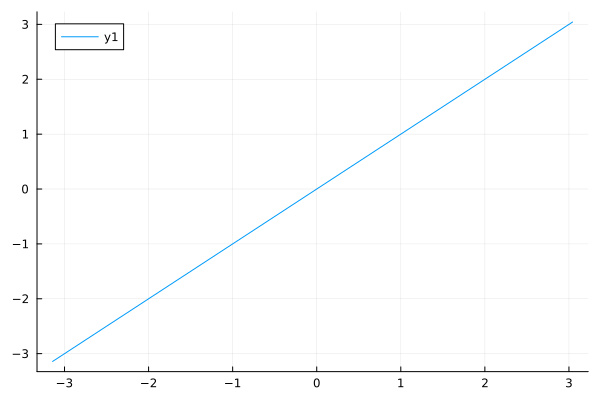

In [62]:
plot(xv,irfft(rft,N))